In [1]:
import tweepy           
import pandas as pd    
import numpy as np
from datetime import datetime
import preprocessor as p
import datetime
import xlsxwriter
import sys
from tweepy.streaming import StreamListener

In [2]:
df1 = pd.read_csv("All_Trump_Tweets.csv")
df1.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,"RT @WhiteHouse: ""America is engaged in a histo...",4/3/2020 23:51,12244.0,0.0,True,1.246220e+18
1,Twitter for iPhone,RT @WhiteHouse: Our hearts go out to the commu...,4/3/2020 23:50,7254.0,0.0,True,1.246220e+18
2,Twitter for iPhone,RT @WhiteHouse: LIVE: Press Briefing with Coro...,4/3/2020 21:24,6807.0,0.0,True,1.246190e+18
3,Twitter for iPhone,Great job being done by @BankofAmerica and man...,4/3/2020 18:49,16337.0,96640.0,False,1.246150e+18
4,Twitter for iPhone,The Paycheck Protection Program is now availab...,4/3/2020 17:51,13350.0,45408.0,False,1.246130e+18


In [3]:
adc = df1.drop(columns=['id_str', 'is_retweet'])

In [4]:
adc = adc.rename(columns={"created_at": "Date", "text": "Tweet", "retweet_count": "Retweets", "favorite_count": "Favorites"})
adc.head()

,source,Tweet,Date,Retweets,Favorites
0,Twitter for iPhone,"RT @WhiteHouse: ""America is engaged in a histo...",4/3/2020 23:51,12244.0,0.0
1,Twitter for iPhone,RT @WhiteHouse: Our hearts go out to the commu...,4/3/2020 23:50,7254.0,0.0
2,Twitter for iPhone,RT @WhiteHouse: LIVE: Press Briefing with Coro...,4/3/2020 21:24,6807.0,0.0
3,Twitter for iPhone,Great job being done by @BankofAmerica and man...,4/3/2020 18:49,16337.0,96640.0
4,Twitter for iPhone,The Paycheck Protection Program is now availab...,4/3/2020 17:51,13350.0,45408.0


In [5]:
adc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 5 columns):
source       16715 non-null object
Tweet        16715 non-null object
Date         16713 non-null object
Retweets     16713 non-null float64
Favorites    16713 non-null float64
dtypes: float64(2), object(3)
memory usage: 653.1+ KB


In [6]:
adc['Date'] = pd.to_datetime(adc['Date'])

In [7]:
adc['New Date'] = adc.Date+pd.offsets.DateOffset(hours=-5)
adc.head()

,source,Tweet,Date,Retweets,Favorites,New Date
0,Twitter for iPhone,"RT @WhiteHouse: ""America is engaged in a histo...",2020-04-03 23:51:00,12244.0,0.0,2020-04-03 18:51:00
1,Twitter for iPhone,RT @WhiteHouse: Our hearts go out to the commu...,2020-04-03 23:50:00,7254.0,0.0,2020-04-03 18:50:00
2,Twitter for iPhone,RT @WhiteHouse: LIVE: Press Briefing with Coro...,2020-04-03 21:24:00,6807.0,0.0,2020-04-03 16:24:00
3,Twitter for iPhone,Great job being done by @BankofAmerica and man...,2020-04-03 18:49:00,16337.0,96640.0,2020-04-03 13:49:00
4,Twitter for iPhone,The Paycheck Protection Program is now availab...,2020-04-03 17:51:00,13350.0,45408.0,2020-04-03 12:51:00


In [8]:
adc['New Date'] = pd.to_datetime(adc['New Date'])

In [9]:
adc['New Date'] = adc['New Date'].dt.strftime('%Y%m%d %H%M')

In [10]:
adc.head()

,source,Tweet,Date,Retweets,Favorites,New Date
0,Twitter for iPhone,"RT @WhiteHouse: ""America is engaged in a histo...",2020-04-03 23:51:00,12244.0,0.0,20200403 1851
1,Twitter for iPhone,RT @WhiteHouse: Our hearts go out to the commu...,2020-04-03 23:50:00,7254.0,0.0,20200403 1850
2,Twitter for iPhone,RT @WhiteHouse: LIVE: Press Briefing with Coro...,2020-04-03 21:24:00,6807.0,0.0,20200403 1624
3,Twitter for iPhone,Great job being done by @BankofAmerica and man...,2020-04-03 18:49:00,16337.0,96640.0,20200403 1349
4,Twitter for iPhone,The Paycheck Protection Program is now availab...,2020-04-03 17:51:00,13350.0,45408.0,20200403 1251


In [11]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [12]:
adc['SA'] = np.array([ analize_sentiment(tweet) for tweet in adc['Tweet'] ])

In [13]:
adc.head()

,source,Tweet,Date,Retweets,Favorites,New Date,SA
0,Twitter for iPhone,"RT @WhiteHouse: ""America is engaged in a histo...",2020-04-03 23:51:00,12244.0,0.0,20200403 1851,0
1,Twitter for iPhone,RT @WhiteHouse: Our hearts go out to the commu...,2020-04-03 23:50:00,7254.0,0.0,20200403 1850,1
2,Twitter for iPhone,RT @WhiteHouse: LIVE: Press Briefing with Coro...,2020-04-03 21:24:00,6807.0,0.0,20200403 1624,1
3,Twitter for iPhone,Great job being done by @BankofAmerica and man...,2020-04-03 18:49:00,16337.0,96640.0,20200403 1349,1
4,Twitter for iPhone,The Paycheck Protection Program is now availab...,2020-04-03 17:51:00,13350.0,45408.0,20200403 1251,1


In [15]:
adc.to_csv('FinalTrumpTweet3.csv')

In [54]:
adc['Hour'] = adc.Date

In [55]:
adc['Hour'] = pd.to_datetime(adc['Hour'])

In [56]:
adc['Hour'] = adc['Hour'].dt.strftime('%H')

In [57]:
adc.head()

,source,Tweet,Date,Retweets,Favorites,New Date,SA,Other Date,Hour
0,Twitter for iPhone,"RT @WhiteHouse: ""America is engaged in a histo...",2020-04-03 23:51:00,12244.0,0.0,20200403 1851,0,23,23
1,Twitter for iPhone,RT @WhiteHouse: Our hearts go out to the commu...,2020-04-03 23:50:00,7254.0,0.0,20200403 1850,1,23,23
2,Twitter for iPhone,RT @WhiteHouse: LIVE: Press Briefing with Coro...,2020-04-03 21:24:00,6807.0,0.0,20200403 1624,1,21,21
3,Twitter for iPhone,Great job being done by @BankofAmerica and man...,2020-04-03 18:49:00,16337.0,96640.0,20200403 1349,1,18,18
4,Twitter for iPhone,The Paycheck Protection Program is now availab...,2020-04-03 17:51:00,13350.0,45408.0,20200403 1251,1,17,17


In [59]:
Hour = adc["Hour"]
Hour.head()

0    23
1    23
2    21
3    18
4    17
Name: Hour, dtype: object

In [63]:
n_by_state = adc.groupby("Hour").count()

In [66]:
n_by_state.head(24)

,source,Tweet,Date,Retweets,Favorites,New Date,SA,Other Date
Hour,,,,,,,,
00,672,672,672,672,672,672,672,672
01,666,666,666,666,666,666,666,666
02,676,676,676,676,676,676,676,676
03,780,780,780,780,780,780,780,780
04,607,607,607,607,607,607,607,607
05,235,235,235,235,235,235,235,235
06,92,92,92,92,92,92,92,92
07,39,39,39,39,39,39,39,39
08,21,21,21,21,21,21,21,21


In [78]:
import plotly.graph_objects as go
import plotly.express as px

x = [0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y = [672, 666, 676, 780, 607, 235, 92, 39, 21, 120, 665, 1349, 1710, 1419, 1148, 824, 606, 582, 572, 749, 750, 800, 843, 788]

fig = go.Figure(data=[go.Bar(x=x, y=y,)])
            
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)


fig.update_layout(
    title='At What Time does Trump Tweet the Most?',
    xaxis_title="Time in Hours of the Day",
    yaxis_title="Number of Tweets From DataSet",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
        
    )
)
fig.show()

In [18]:
import matplotlib.pyplot as plt

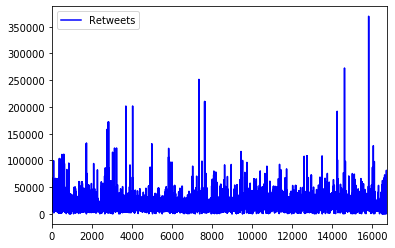

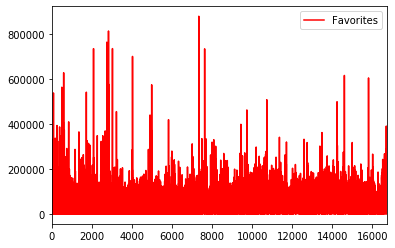

In [31]:
adc.plot(kind='line',y='Retweets',color = 'blue')
adc.plot(kind='line',y='Favorites', color='red')


plt.show()

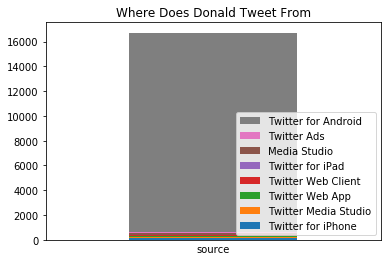

In [47]:
adc.assign(dummy = 1).groupby(
  ['dummy','source']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Where Does Donald Tweet From')

# other it'll show up as 'dummy' 
plt.xlabel('source')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(adc['source'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

In [32]:
pos_tweets = [ tweet for index, tweet in enumerate(adc['Tweet']) if adc['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(adc['Tweet']) if adc['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(adc['Tweet']) if adc['SA'][index] < 0]

In [34]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(adc['Tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(adc['Tweet'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(adc['Tweet'])))

Percentage of positive tweets: 52.019144481005085%
Percentage of neutral tweets: 26.796290756805266%
Percentage de negative tweets: 21.184564762189652%


In [42]:
import plotly.graph_objects as go
import plotly.express as px

x = ['positive', 'neutral', 'negative']
y = [52.019, 26.796, 21.185]

fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['SA = +1', 'SA = 0', 'SA = -1'])])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Percentages of Positive, Neutral and Negative Tweets')
fig.show()